# Model Diagnostics

The purpose of this assigment is introduce you to a new library for linear regression called statmodels which is much better suited for inferential modeling than sklearn. This assignment is also to familiarize yourself with some of most important procedures for improving the interpretability of regression coefficients. You will also perform important statistical tests that will help establish that whether or not important assumptions that safeguard the interpretability of OLS coefficients have been met. 

We will continue to use the Ames Housing Dataset so that you can focus on the techniques and not on cleaning/getting associated with a brand new dataset.

In [107]:
from __future__ import print_function, division
import pandas as pd

from __future__ import print_function, division
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# Imports all in one place
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from scipy import stats

In [108]:
# pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [148]:
df_url = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv')

In [149]:
df_url.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [150]:
df = df_url[["MSSubClass", "LotArea", "Neighborhood", "HouseStyle", "YearBuilt" , "YearRemodAdd", 
               "TotalBsmtSF", "GrLivArea", "BsmtFullBath", "BsmtHalfBath", "BedroomAbvGr",
               "GarageType", "TotRmsAbvGrd", "SalePrice"]]

In [151]:
df_url.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
  

In [152]:
df.head()

,MSSubClass,LotArea,Neighborhood,HouseStyle,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,BsmtFullBath,BsmtHalfBath,BedroomAbvGr,GarageType,TotRmsAbvGrd,SalePrice
0,60,8450,CollgCr,2Story,2003,2003,856,1710,1,0,3,Attchd,8,208500
1,20,9600,Veenker,1Story,1976,1976,1262,1262,0,1,3,Attchd,6,181500
2,60,11250,CollgCr,2Story,2001,2002,920,1786,1,0,3,Attchd,6,223500
3,70,9550,Crawfor,2Story,1915,1970,756,1717,1,0,3,Detchd,7,140000
4,60,14260,NoRidge,2Story,2000,2000,1145,2198,1,0,4,Attchd,9,250000


In [153]:
df.shape

(1460, 14)

In [154]:
df.isna().sum()

MSSubClass       0
LotArea          0
Neighborhood     0
HouseStyle       0
YearBuilt        0
YearRemodAdd     0
TotalBsmtSF      0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
BedroomAbvGr     0
GarageType      81
TotRmsAbvGrd     0
SalePrice        0
dtype: int64

In [155]:
df['GarageType'] = df['GarageType'].replace({np.nan: 'No garage'})

/home/mishraka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [117]:
df.isna().sum()

MSSubClass      0
LotArea         0
Neighborhood    0
HouseStyle      0
YearBuilt       0
YearRemodAdd    0
TotalBsmtSF     0
GrLivArea       0
BsmtFullBath    0
BsmtHalfBath    0
BedroomAbvGr    0
GarageType      0
TotRmsAbvGrd    0
SalePrice       0
dtype: int64

In [156]:
from sklearn.preprocessing import LabelEncoder
def dummyEncode(df):
        columnsToEncode = list(df.select_dtypes(include=['category','object']))
        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                df[feature] = le.fit_transform(df[feature])
            except:
                print('Error encoding '+feature)
        return df

In [157]:
dummyEncode(df)

/home/mishraka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,MSSubClass,LotArea,Neighborhood,HouseStyle,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,BsmtFullBath,BsmtHalfBath,BedroomAbvGr,GarageType,TotRmsAbvGrd,SalePrice
0,60,8450,5,5,2003,2003,856,1710,1,0,3,1,8,208500
1,20,9600,24,2,1976,1976,1262,1262,0,1,3,1,6,181500
2,60,11250,5,5,2001,2002,920,1786,1,0,3,1,6,223500
3,70,9550,6,5,1915,1970,756,1717,1,0,3,5,7,140000
4,60,14260,15,5,2000,2000,1145,2198,1,0,4,1,9,250000
5,50,14115,11,0,1993,1995,796,1362,1,0,1,1,5,143000
6,20,10084,21,2,2004,2005,1686,1694,1,0,3,1,7,307000
7,60,10382,14,5,1973,1973,1107,2090,1,0,3,1,7,200000
8,50,6120,17,0,1931,1950,952,1774,0,0,2,5,8,129900
9,190,7420,3,1,1939,1950,991,1077,1,0,2,1,5,118000


/home/mishraka/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


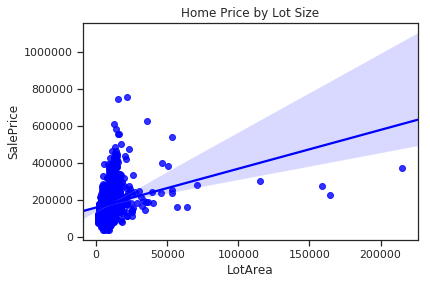

In [158]:
sns.regplot(df["LotArea"], df['SalePrice'], color='blue').set_title('Home Price by Lot Size')

/home/mishraka/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


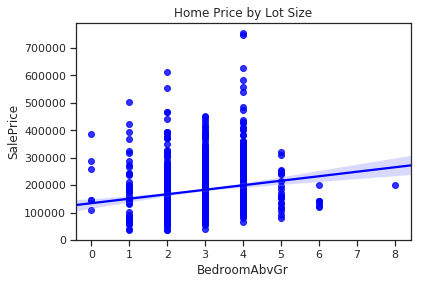

In [159]:
sns.regplot(df["BedroomAbvGr"], df['SalePrice'], color='blue').set_title('Home Price by Lot Size')

In [160]:
df.columns

Index(['MSSubClass', 'LotArea', 'Neighborhood', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'BedroomAbvGr', 'GarageType', 'TotRmsAbvGrd', 'SalePrice'], dtype='object')

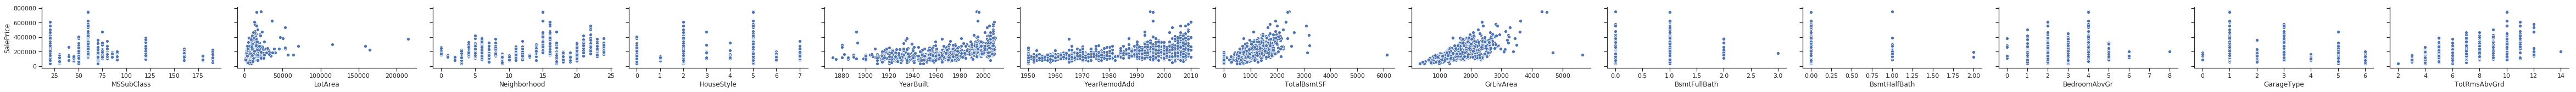

In [161]:
sns.set(style="ticks", color_codes=True)

# Generate a list of column headers not including price
x_columns = df.columns.drop('SalePrice')

# Only plot the scatterplot of x variables with our y variable
fig = sns.pairplot(data=df, y_vars=['SalePrice'], x_vars=x_columns, height=2.5, aspect=2)


## 1.1 Choose an X and Y variable from your dataset and use them to create a Seaborn Regplot

/home/mishraka/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


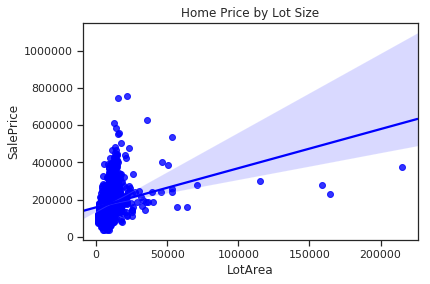

In [162]:
sns.regplot(df["LotArea"], df['SalePrice'], color='blue').set_title('Home Price by Lot Size')
#fig = sns.regplot(heights, weights, color='blue').set_title('Home')

The plots look the same even when you change them to array

In [163]:
y = df['SalePrice'].values
x = df['LotArea'].values

In [164]:
A = np.array([y])
B = np.array([x])

In [165]:
print(A)
print(B)

[[208500 181500 223500 ... 266500 142125 147500]]
[[ 8450  9600 11250 ...  9042  9717  9937]]


In [168]:
df['ln_price'] = np.log(df['SalePrice'])

/home/mishraka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


/home/mishraka/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


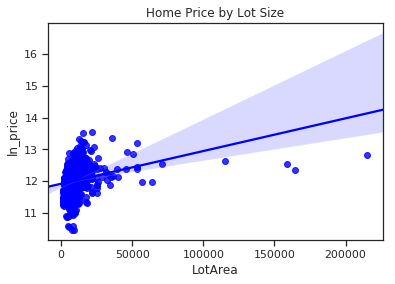

In [169]:
sns.regplot(df["LotArea"], df['ln_price'], color='blue').set_title('Home Price by Lot Size')

## 1.2 Now using the X variables that you feel like will be the best predictors of y use statsmodel to run the multiple regression between these variables and Y. You don't need to use every X variable in your dataset, in fact it's probably better if you don't. Just pick ones that you have already cleaned that seem the most relevant to house prices.

In [170]:
df.columns

Index(['MSSubClass', 'LotArea', 'Neighborhood', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'BedroomAbvGr', 'GarageType', 'TotRmsAbvGrd', 'SalePrice', 'ln_price'], dtype='object')

In [183]:

from sklearn.linear_model import LinearRegression

# The Scikit-Learn code is the same every time.
y = df.loc[:, ['SalePrice']].values
X = df.loc[:, ['HouseStyle','LotArea','TotalBsmtSF', 'TotRmsAbvGrd', 'GrLivArea', 'Neighborhood']].values

print(y.shape)
print(X.shape)

model = LinearRegression()
model.fit(X, y)

beta_0 = model.intercept_
beta_i = model.coef_[0]

print("Slope Coefficients: ", beta_i)
print("\nIntercept Value: ", beta_0)

(1460, 1)
(1460, 6)
Slope Coefficients:  [ 4.44923626e+03  2.76828939e-01  6.92637851e+01 -2.75153388e+03
  8.05680108e+01  9.85037143e+02]

Intercept Value:  [-24982.07710676]


In [172]:

from sklearn.linear_model import LinearRegression

# The Scikit-Learn code is the same every time.
y = df['SalePrice']
X = df[['HouseStyle','LotArea','TotalBsmtSF', 'TotRmsAbvGrd']]

print(y.shape)
print(X.shape)

model = LinearRegression()
model.fit(X, y)

beta_0 = model.intercept_
beta_i = model.coef_[0]

print("Slope Coefficients: ", beta_i)
print("\nIntercept Value: ", beta_0)

(1460,)
(1460, 4)
Slope Coefficients:  7398.502441022537

Intercept Value:  -52312.03982009407


In [173]:
y = df['SalePrice']
X = df.drop(['SalePrice', 'ln_price'], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.3, random_state=42)

# fit model using train datasets
model = LinearRegression()
model.fit(X_train, Y_train)

# Create new predictions using x_test
y_pred = model.predict(X_test)

# Measure Accuracy using y_test and y_pred
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

print('RMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2))

print("coefficients: ", model.coef_[0])
print("intercepts: ", model.intercept_)

RMSE is 40178.09906602744
R^2 is 0.7686646669043581
coefficients:  -224.6200937222645
intercepts:  -2157784.6058967975


In [174]:
y = df['SalePrice']
X = df[['HouseStyle','LotArea','TotalBsmtSF', 'TotRmsAbvGrd']]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5, random_state=42)

# fit model using train datasets
model = LinearRegression()
model.fit(X_train, Y_train)

# Create new predictions using x_test
y_pred = model.predict(X_test)

# Measure Accuracy using y_test and y_pred
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

print('RMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2))

print("coefficients: ", model.coef_[0])
print("intercepts: ", model.intercept_)

RMSE is 53448.18906414223
R^2 is 0.5809808439047122
coefficients:  6447.8686302095475
intercepts:  -33052.992272579024


In [175]:
df.columns

Index(['MSSubClass', 'LotArea', 'Neighborhood', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'BedroomAbvGr', 'GarageType', 'TotRmsAbvGrd', 'SalePrice', 'ln_price'], dtype='object')

## 1.3 Identify the standard errors and P-Values of these coefficients in the output table. What is the interpretation of the P-values here?

In [176]:
#Lets prepare our X and y
X = df[['HouseStyle','LotArea','TotalBsmtSF', 'TotRmsAbvGrd', 'GrLivArea', 'Neighborhood']]
y = df['SalePrice']

In [177]:
# Use Statsmodels to run a regression

# This is like using np.ones to add a vector of ones
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     406.2
Date:                Thu, 17 Jan 2019   Prob (F-statistic):          2.04e-306
Time:                        15:35:21   Log-Likelihood:                -17825.
No. Observations:                1460   AIC:                         3.566e+04
Df Residuals:                    1453   BIC:                         3.570e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2.498e+04   6350.521     -3.934   

The interpretation of p-values: p-values are basically null hypothesis testing. We assume that there is no relationship between Sale price (our y variable) and other independent variables (X) such as House Style, Lot Area etc. Zero p-value means we reject the null hypothesis and accept our alternative hypothesis that there is some relationship. Positive p-value (more that >0.05)suggests that our null hypothesis is true. A low p-value (< 0.05) indicates that you can reject the null hypothesis.

The standard error is an estimate of the standard deviation of the coefficient, the amount it varies across cases. It can be thought of as a measure of the precision with which the regression coefficient is measured. If a coefficient is large compared to its standard error, then it is probably different from 0.


## 1.4 Remove outliers from your dataset and run the regression again. Do you see a change in some coefficients? Which seem to move the most?

In [178]:
# # Lets remove outliers 

print(df.shape)

df_outliers_removed = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

print(df_outliers_removed.shape)

(1460, 15)
(1277, 15)


In [184]:
#running regression again
from sklearn.linear_model import LinearRegression

# The Scikit-Learn code is the same every time.
y = df_outliers_removed.loc[:, ['SalePrice']].values
X = df_outliers_removed.loc[:, ['HouseStyle','LotArea','TotalBsmtSF', 'TotRmsAbvGrd', 'GrLivArea', 'Neighborhood']].values

print(y.shape)
print(X.shape)

model = LinearRegression()
model.fit(X, y)

beta_0 = model.intercept_
beta_i = model.coef_[0]

print("Slope Coefficients: ", beta_i)
print("\nIntercept Value: ", beta_0)

(1277, 1)
(1277, 6)
Slope Coefficients:  [ 5.28639118e+03  8.41124730e-01  7.63132137e+01 -2.96059655e+03
  8.05729694e+01  6.66368781e+02]

Intercept Value:  [-34595.0180118]


#raw data before removing the outliers
['HouseStyle','LotArea','TotalBsmtSF', 'TotRmsAbvGrd', 'GrLivArea', 'Neighborhood']
(1460, 1)
(1460, 6)
Slope Coefficients:  [ 4.44923626e+03  2.76828939e-01  6.92637851e+01 -2.75153388e+03
  8.05680108e+01  9.85037143e+02]

Intercept Value:  [-24982.07710676]
    
## Outlier removed    
(1277, 1)
(1277, 6)
Slope Coefficients:  [ 5.28639118e+03  8.41124730e-01  7.63132137e+01 -2.96059655e+03
  8.05729694e+01  6.66368781e+02]

Intercept Value:  [-34595.0180118]
### Lot Area then the neighbourhood coef moved the most

## 1.5 Create a new log(y) variable and use it to run a log-linear regression of your variables using statmodels 

In [181]:
df_outliers_removed['ln_price'] = np.log(df_outliers_removed['SalePrice'])

/home/mishraka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [185]:
# Log-Linear Regression
X = df_outliers_removed[['HouseStyle','LotArea','TotalBsmtSF', 'TotRmsAbvGrd', 'GrLivArea', 'Neighborhood']] 

y = df_outliers_removed['ln_price']

# This is like using np.ones to add a vector of ones
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     514.8
Date:                Thu, 17 Jan 2019   Prob (F-statistic):               0.00
Time:                        15:48:11   Log-Likelihood:                 250.42
No. Observations:                1277   AIC:                            -486.8
Df Residuals:                    1270   BIC:                            -450.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           10.8367      0.030    361.002   

## 2.1 Run a test for high levels of collinearity in your dataset. Calculate the Variance Inflation Factor for each X variable. Do you see VIF values greater than ten? If so try omitting those X variables and run your regression again. Do the standard errors change? Do the coefficients change? Do the coefficients seem to have an interpretation that matches your intuition?

In [186]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

print(X.columns, '\n\n')

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

Index(['const', 'HouseStyle', 'LotArea', 'TotalBsmtSF', 'TotRmsAbvGrd', 'GrLivArea', 'Neighborhood'], dtype='object') 


[28.932455844573393, 1.222831897081418, 1.220994378723322, 1.3554576698217304, 3.1992184824980168, 3.6878919995100787, 1.0417048282098704]


## 2.2 Variables that have high levels of multicollinearity should also be highly correlated with each other. Calculate your X matrix's correlation matrix to check if the variables highlighted by the VIF test truly are highly correlated.

In [187]:
no_const = X.drop('const', axis=1)
no_const.corr()

,HouseStyle,LotArea,TotalBsmtSF,TotRmsAbvGrd,GrLivArea,Neighborhood
HouseStyle,1.000000,0.013252,-0.179304,0.268158,0.294748,0.027853
LotArea,0.013252,1.000000,0.295951,0.349625,0.369891,0.074635
TotalBsmtSF,-0.179304,0.295951,1.000000,0.220671,0.355789,0.166791
TotRmsAbvGrd,0.268158,0.349625,0.220671,1.000000,0.822205,0.071394
GrLivArea,0.294748,0.369891,0.355789,0.822205,1.000000,0.140789
Neighborhood,0.027853,0.074635,0.166791,0.071394,0.140789,1.000000


## 2.3 If you have variables with high Variance Inflation Factors, try excluding them from your regression. Do your standard errors improve? (get smaller). If high levels of multicollinearity are removed, the precision of the dataset should increase.

In [0]:
##### Your Code Here #####

## 2.4 Recalculate your regression using Robust Standard Errors? What happens to your standard errors?

In [188]:
# Lets run our regression again using Robust Standard Errors
# cov_type='HC3' parameter to .fit() function

# Log-Linear Regression

X = df_outliers_removed[['HouseStyle','LotArea','TotalBsmtSF', 'TotRmsAbvGrd', 'GrLivArea', 'Neighborhood']] 
y = df_outliers_removed['ln_price']

# This is like using np.ones to add a vector of ones
X = sm.add_constant(X)

model = sm.OLS(y, X).fit(cov_type='HC3')
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     406.7
Date:                Thu, 17 Jan 2019   Prob (F-statistic):          1.87e-291
Time:                        16:01:28   Log-Likelihood:                 250.42
No. Observations:                1277   AIC:                            -486.8
Df Residuals:                    1270   BIC:                            -450.8
Df Model:                           6                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           10.8367      0.035    312.035   

In [ ]:
 robust standard errors essentially correct heteroskedasticity in our data while the side effects are minimal.

## 2.5 Use scatterplots or Seaborn's pairplot functionality to perform an eyeball test for potential variables that would be candidates for generating polynomial regressors. 

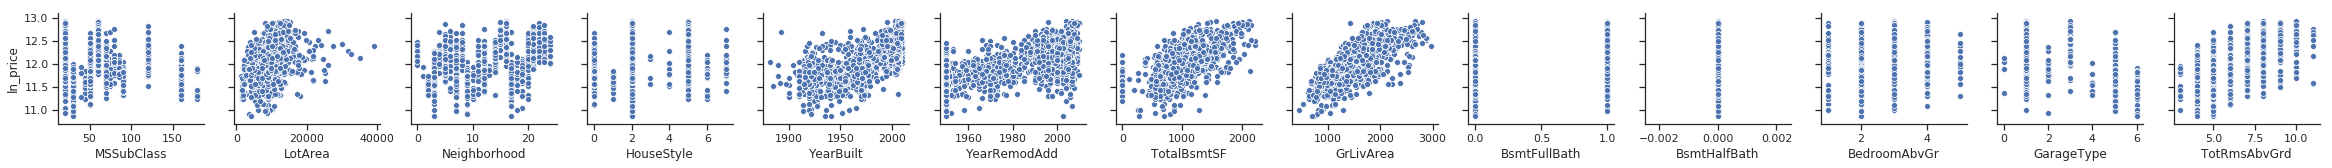

In [190]:
sns.set(style="ticks", color_codes=True)

# Generate a list of column headers not including price
x_columns = df_outliers_removed.columns.drop(['SalePrice', 'ln_price'])

# Only plot the scatterplot of x variables with our y variable
fig = sns.pairplot(data=df_outliers_removed, y_vars=['ln_price'], x_vars=x_columns)

## 2.6 Use seaborn's residplot to plot the distribution of each x variable's residuals. Does these plots indicate any other features that would be potential candidates for polynomial features.

In [194]:
X.columns

Index(['const', 'HouseStyle', 'LotArea', 'TotalBsmtSF', 'TotRmsAbvGrd', 'GrLivArea', 'Neighborhood'], dtype='object')

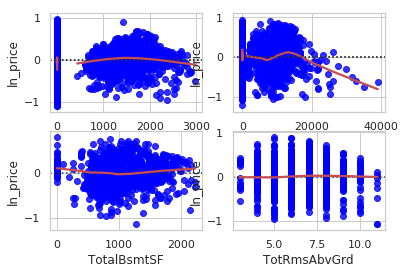

In [203]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(ncols=2, nrows=2)
sns.residplot(X['HouseStyle'], y, lowess=True, color="r", ax=axs[0][0], scatter_kws={'color':'blue'})
sns.residplot(X['LotArea'], y, lowess=True, color="r", ax=axs[0][1], scatter_kws={'color':'blue'})
sns.residplot(X['TotalBsmtSF'], y, lowess=True, color="r", ax=axs[1][0], scatter_kws={'color':'blue'})
sns.residplot(X['TotRmsAbvGrd'], y, lowess=True, color="r", ax=axs[1][1], scatter_kws={'color':'blue'})

# sns.residplot(X['GrLivArea'], y, lowess=True, color="r", ax=axs[0][0], scatter_kws={'color':'blue'})
# sns.residplot(X['Neighborhood'], y, lowess=True, color="r", ax=axs[0][1], scatter_kws={'color':'blue'})

/home/mishraka/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in true_divide
  res = _lowess(y, x, frac=frac, it=it, delta=delta)
/home/mishraka/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/home/mishraka/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


IndexError: index 2 is out of bounds for axis 0 with size 2

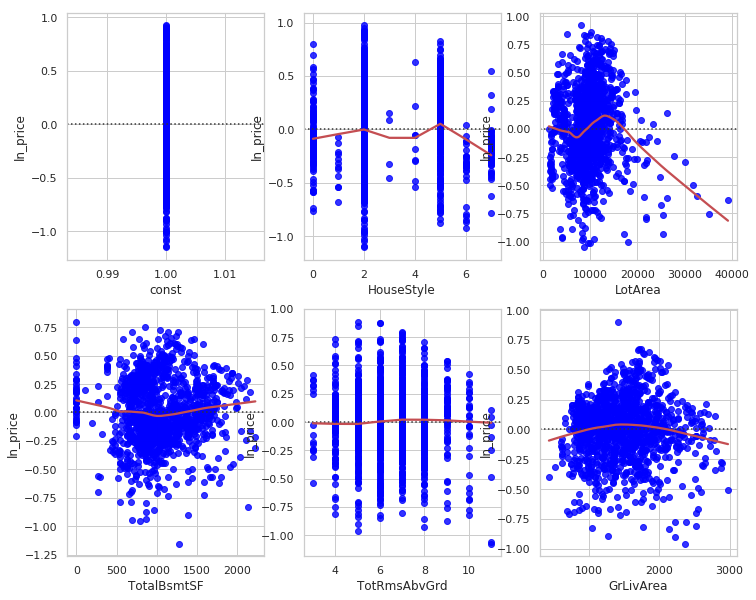

In [209]:
# There are 12 columns in X
sns.set(style="whitegrid")
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(12,10));

# Positions in the array of axes that I just made
position_list = []
for i in range(4):
    for j in range(3):
        position_list.append((i,j))
        
for col, pos in zip(X.columns, position_list):
    sns.residplot(X[col], y, lowess=True, color="r", ax=axs[pos[0]][pos[1]],
                  scatter_kws={'color':'blue'})
plt.tight_layout()

## 2.6 Feature Engineer the appropriate polynomial features from your analysis above and include them in one final log-polynomial, robust standard error, regression. Do the coefficients of this most advanced regression match your intuition better than the coefficients of the very first regression that we ran with the Statmodels library?

In [210]:
X.columns

Index(['const', 'HouseStyle', 'LotArea', 'TotalBsmtSF', 'TotRmsAbvGrd', 'GrLivArea', 'Neighborhood'], dtype='object')

In [211]:
df_outliers_removed['LotArea_squared'] = df_outliers_removed['LotArea']**2
df_outliers_removed['HouseStyle_squared'] = df_outliers_removed['HouseStyle']**2
df_outliers_removed['TotalBsmtSF_squared'] = df_outliers_removed['TotalBsmtSF']**2
df_outliers_removed['GrLivArea_squared'] = df_outliers_removed['GrLivArea']**2

/home/mishraka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/mishraka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/mishraka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [212]:
df_outliers_removed.columns

Index(['MSSubClass', 'LotArea', 'Neighborhood', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'BedroomAbvGr', 'GarageType', 'TotRmsAbvGrd', 'SalePrice', 'ln_price', 'LotArea_squared', 'HouseStyle_squared', 'TotalBsmtSF_squared', 'GrLivArea_squared'], dtype='object')

In [213]:
X.columns

Index(['const', 'HouseStyle', 'LotArea', 'TotalBsmtSF', 'TotRmsAbvGrd', 'GrLivArea', 'Neighborhood'], dtype='object')

In [215]:
# log-polynomial? linear regression model with robust standard errors 

# to use Robust Standard Errors pass:
# cov_type='HC3' parameter to .fit() function

X = df_outliers_removed[['HouseStyle', 'LotArea', 'TotalBsmtSF', 'TotRmsAbvGrd', 'GrLivArea', 'Neighborhood',
                       'LotArea_squared', 'HouseStyle_squared', 'TotalBsmtSF_squared', 'GrLivArea_squared']] 

y = df_outliers_removed['ln_price']

# This is like using np.ones to add a vector of ones
X = sm.add_constant(X)

model = sm.OLS(y, X).fit(cov_type='HC3')
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     295.5
Date:                Thu, 17 Jan 2019   Prob (F-statistic):          1.17e-303
Time:                        16:49:20   Log-Likelihood:                 280.99
No. Observations:                1277   AIC:                            -540.0
Df Residuals:                    1266   BIC:                            -483.3
Df Model:                          10                                         
Covariance Type:                  HC3                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  10.5012    

/home/mishraka/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 10, but rank is 9
  'rank is %d' % (J, J_), ValueWarning)


# Stretch Goals

- Research the assumptions that are required for OLS to be BLUE the "Best Linear Unbiased Estimator". You might try searching and trying to understand the conditions of what's called the Gauss-Markov Theorem.
- Research other Diagnostic tests. Can you show that residuals are normally distributed graphically?
- Study for the sprint challenge!
- Write a blog post about iferential modeling using linear regression.